# House Price Prediction

Calling libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datacleaner import autoclean

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

Uploading data

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\Downloads\house_price_regression_dataset.csv")

Data exploration

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


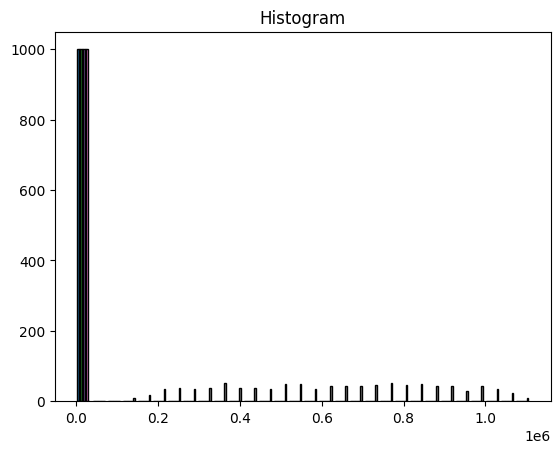

In [5]:
plt.hist(df, bins=30, edgecolor='k')
plt.title('Histogram')
plt.show()

In [9]:
scaler = RobustScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[ num_cols])

In [10]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-0.715476,-0.5,-0.5,-0.141844,-0.979061,-0.5,-0.2,-0.859907
1,0.671190,0.0,0.5,0.851064,0.860857,0.0,0.0,0.839012
2,0.347381,-1.0,0.0,0.851064,0.365506,-0.5,0.6,0.351851
3,-0.903095,-1.0,0.0,-0.255319,-0.035029,0.0,0.4,-0.936721
4,0.982619,-0.5,-0.5,0.198582,0.836961,-0.5,0.4,0.971752


Model traning

In [11]:
x = df.drop(columns=['House_Price'])
y = df['House_Price']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
models = {
  'DecisionTreeRegressor': DecisionTreeRegressor(),
  'RandomForestRegressor': RandomForestRegressor(),
  'LGBMRegressor': LGBMRegressor()
}

param_grid = {
  'max_depth': [None, 10, 20, 30, 40, 50],
  'min_samples_split': [2, 4, 10],
  'min_samples_leaf': [1,2,4],
  'max_features': [None, 'sqrt', 'log2']
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)



results = []
for name, model in models.items():

  grid_search = GridSearchCV(
  estimator=model,
  param_grid=param_grid,
  scoring={'mse': mse_scorer, 'r2': r2_scorer},
  refit='r2',
  cv=5,
  n_jobs=-1
)
  
  grid_search.fit(x_train, y_train)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_val)

  mse = mean_squared_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)

  results.append({'Model': name, 'mse': mse, 'r2': r2})
results_df = pd.DataFrame(results).sort_values(by='r2', ascending=True)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 7
[LightGBM] [Info] Start training from score -0.022776
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [22]:
results_df

,Model,mse,r2
0,DecisionTreeRegressor,0.004862,0.985964
1,RandomForestRegressor,0.002019,0.994171
2,LGBMRegressor,0.001316,0.996200


Just checking whether model performed as expected and it did!

In [24]:
grid_search.best_estimator_

LGBMRegressor(max_depth=None, max_features=None, min_samples_leaf=4,
              min_samples_split=2)

In [25]:
grid_search.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [27]:
models.values()

dict_values([DecisionTreeRegressor(), RandomForestRegressor(), LGBMRegressor()])